In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


SILHOUETTE:  0.3377579527269339


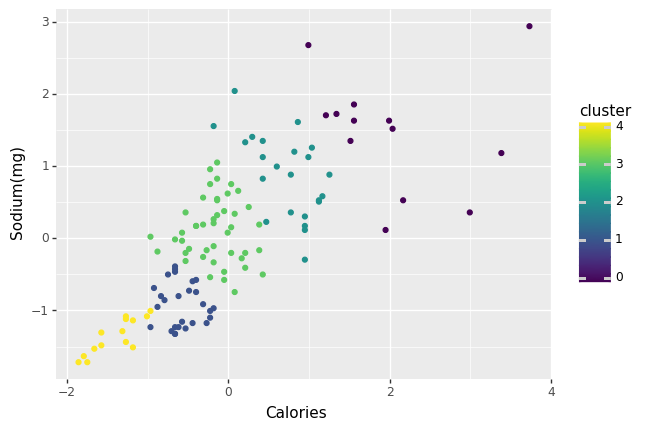

<ggplot: (306494594)>

In [4]:
features = ["Calories", "Sodium(mg)"]
X = bk[features]

z = StandardScaler()

X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 5)

EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETTE: ", silhouette_score(X, cluster))

X["cluster"] = cluster

(ggplot(X, aes(x = "Calories", y = "Sodium(mg)", color = "cluster")) + geom_point())


# Multiple Dimensions

In [5]:
features = ["Sugar(g)", "Protein(g)", "Fat(g)"]

X = bk[features]

z = StandardScaler()

X[features] = z.fit_transform(X)


In [6]:
EM = GaussianMixture(n_components = 3)

EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [7]:
cluster = EM.predict(X)
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1])

In [8]:
silhouette_score(X, cluster)

0.41269446652563374

In [9]:
EM.predict_proba(X)

array([[6.61610659e-023, 5.85130020e-007, 9.99999415e-001],
       [9.54619426e-019, 2.08090892e-009, 9.99999998e-001],
       [8.26491593e-024, 5.65851237e-017, 1.00000000e+000],
       [1.10138989e-010, 4.07225869e-021, 1.00000000e+000],
       [1.54584050e-016, 5.71032883e-019, 1.00000000e+000],
       [2.28985615e-017, 2.60794614e-007, 9.99999739e-001],
       [3.23093253e-018, 1.78783299e-011, 1.00000000e+000],
       [2.94114465e-014, 1.86268166e-029, 1.00000000e+000],
       [2.45979727e-002, 7.97298032e-025, 9.75402027e-001],
       [8.53743710e-001, 4.75716633e-051, 1.46256290e-001],
       [9.98891720e-001, 1.44028577e-095, 1.10827980e-003],
       [9.99997573e-001, 3.48854951e-138, 2.42696410e-006],
       [5.79067452e-001, 3.88876052e-018, 4.20932548e-001],
       [5.16467876e-001, 7.84132485e-021, 4.83532124e-001],
       [9.70230232e-001, 2.05227689e-058, 2.97697682e-002],
       [9.89404706e-001, 3.90622426e-066, 1.05952940e-002],
       [9.99989440e-001, 4.20067008e-125

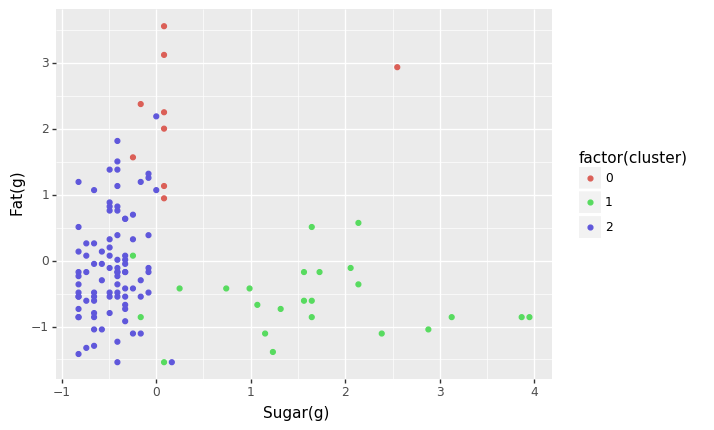

<ggplot: (306489402)>

In [10]:
X["cluster"] = cluster

(ggplot(X, aes(x = "Sugar(g)", y = "Fat(g)", color = "factor(cluster)")) + geom_point())

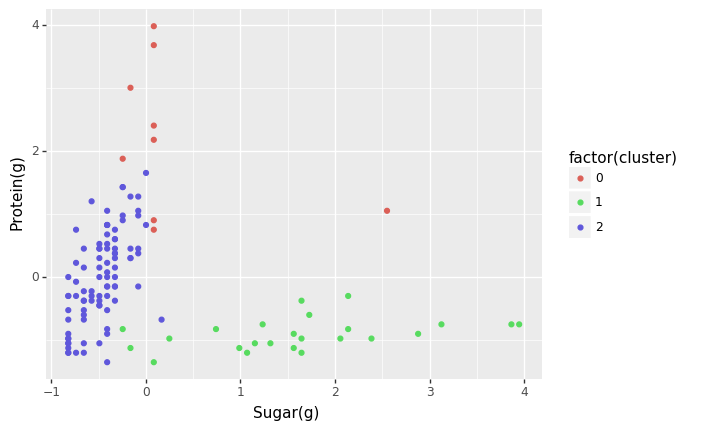

<ggplot: (310930827)>

In [11]:
(ggplot(X, aes(x = "Sugar(g)", y = "Protein(g)", color = "factor(cluster)")) + geom_point())

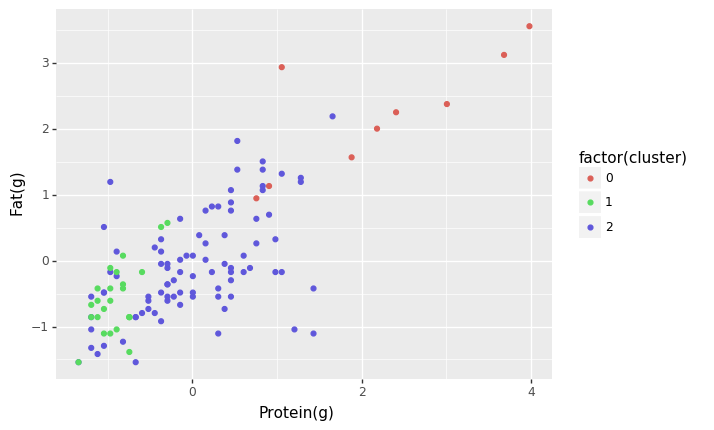

<ggplot: (310964297)>

In [12]:
(ggplot(X, aes(x = "Protein(g)", y = "Fat(g)", color = "factor(cluster)")) + geom_point())

# IN CLASS

In [13]:
bey = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv")
bey.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


In [18]:
features = ["speechiness", "acousticness", "instrumentalness", "liveness", "valence"]

# z = StandardScaler() they have the same scale
X[features] = bey[features]
Xdf = X

n_components = [2,3,4,5,6,7]

sils = []
for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    colName = str(n) + "assign"
    clusters = gmm.predict(X)
    
    Xdf[colName] = clusters
    
    sils.append(silhouette_score(X, clusters))
    
print(sils)

[0.41947161360368157, 0.5611802663084754, 0.6434866861229612, 0.7144575733135593, 0.7323873569127406, 0.7497347427810223]


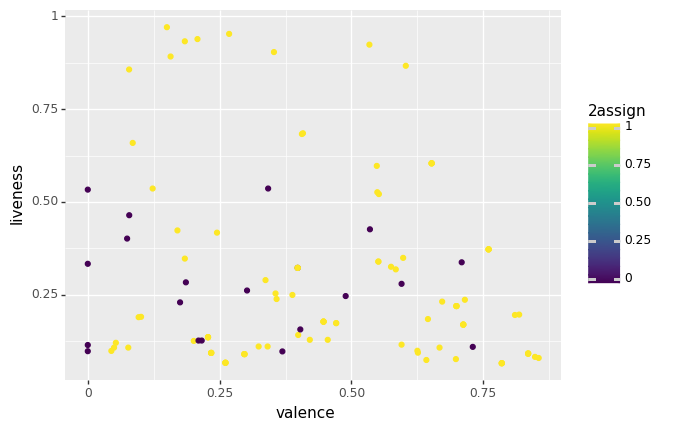

<ggplot: (310964444)>

In [21]:
(ggplot(Xdf, aes(x = "valence", y = "liveness", color = "2assign")) + geom_point())